In [1]:
# Install this module whenever libnirs isn't 
#%pip install --user -U git+https://github.com/jdtatz/libnirs.git

In [1]:
import numpy as np
from libnirs import *
import pandas as pd
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
from matplotlib import rc
from matplotlib import rcParams
latex_path = '/usr/local/texlive/2023/bin/universal-darwin'

rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'



In [2]:
#Run this just on local 
%env PATH=/Library/TeX/texbin:$PATH

env: PATH=/Library/TeX/texbin:$PATH


In [3]:
file_names = ['Only_LRF_IVH','Only_LRF_Preterm']
keys=['IVH','PBI']

In [4]:
wavelengths = ['673','686','701','724','754','784','814','827','852']
population_dataframes_dict={}
for name, key in zip(file_names, keys): 
    population_dataframes_dict[key] = pd.read_excel(name+'.xlsx')
    organized_df = pd.DataFrame()
    
    for w in wavelengths: 
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]

        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
                
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]
        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
    
    organized_df = organized_df.dropna()
    
    population_dataframes_dict[key] = organized_df

In [5]:

def create_dictionary_µs(dictionary_of_data_frames,wvls, return_min):
    stat_dict={}; µus_dict = {}; min_value_µa = 10000; min_value_µsp = 1000; max_value_µa = 0; max_value_µsp = 0;
    for key in list(dictionary_of_data_frames.keys()):
        µsp_dict = {}; µa_dict = {}; µ_categories={}; µsp_stat_dict = {}; µa_stat_dict={};  stat_categories={}; 
        for w in wvls:
            µsp_stat_array = []; µa_stat_array=[]
            µsp_dict[w] = np.asarray(dictionary_of_data_frames[key]['µsp_'+w])
            µa_dict[w] = np.asarray(dictionary_of_data_frames[key]['µa_'+w])         

            µsp_stat_array =  np.append(µsp_stat_array,min(µsp_dict[w])); µsp_stat_array =  np.append(µsp_stat_array,max(µsp_dict[w]))
            µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 95)); µsp_stat_array =  np.append(µsp_stat_array,np.percentile(µsp_dict[w], 99))
            µsp_stat_dict[w] = µsp_stat_array
                
            µa_stat_array =  np.append(µa_stat_array,min(µa_dict[w])); µa_stat_array =  np.append(µa_stat_array,max(µa_dict[w]))
            µa_stat_array =  np.append(µa_stat_array,np.percentile(µa_dict[w], 95)); µa_stat_array =  np.append(µa_stat_array,np.percentile(µa_dict[w], 99))
            µa_stat_dict[w] = µa_stat_array

           
            if min(µsp_dict[w]) < min_value_µsp: 
                min_value_µsp = min(µsp_dict[w])
            if min(µa_dict[w]) < min_value_µa: 
                min_value_µa = min(µa_dict[w])
                
            if max(µsp_dict[w]) > max_value_µsp: 
                max_value_µsp = max(µsp_dict[w])
            if max(µa_dict[w]) > max_value_µa: 
                max_value_µa = max(µa_dict[w])

        
        stat_categories['µsp_stats'] = µsp_stat_dict; stat_categories['µa_stats'] = µa_stat_dict
        µ_categories['µsp_dict']= µsp_dict ; µ_categories['µa_dict']= µa_dict 
        µus_dict[key] =  µ_categories
        stat_dict[key] =  stat_categories

    #stat_dict returns the values of min, max, 95, and 99 percentile in that order

    if return_min: 
        return µus_dict, max_value_µsp, min_value_µsp, max_value_µa, min_value_µa, stat_dict
        
    else: 
        return µus_dict, stat_dict

    


In [6]:
µs_values_dict, max_value_µsp_, min_value_µsp_, max_value_µa_, min_value_µa_, stat_values_dict = create_dictionary_µs(population_dataframes_dict,wavelengths,True)

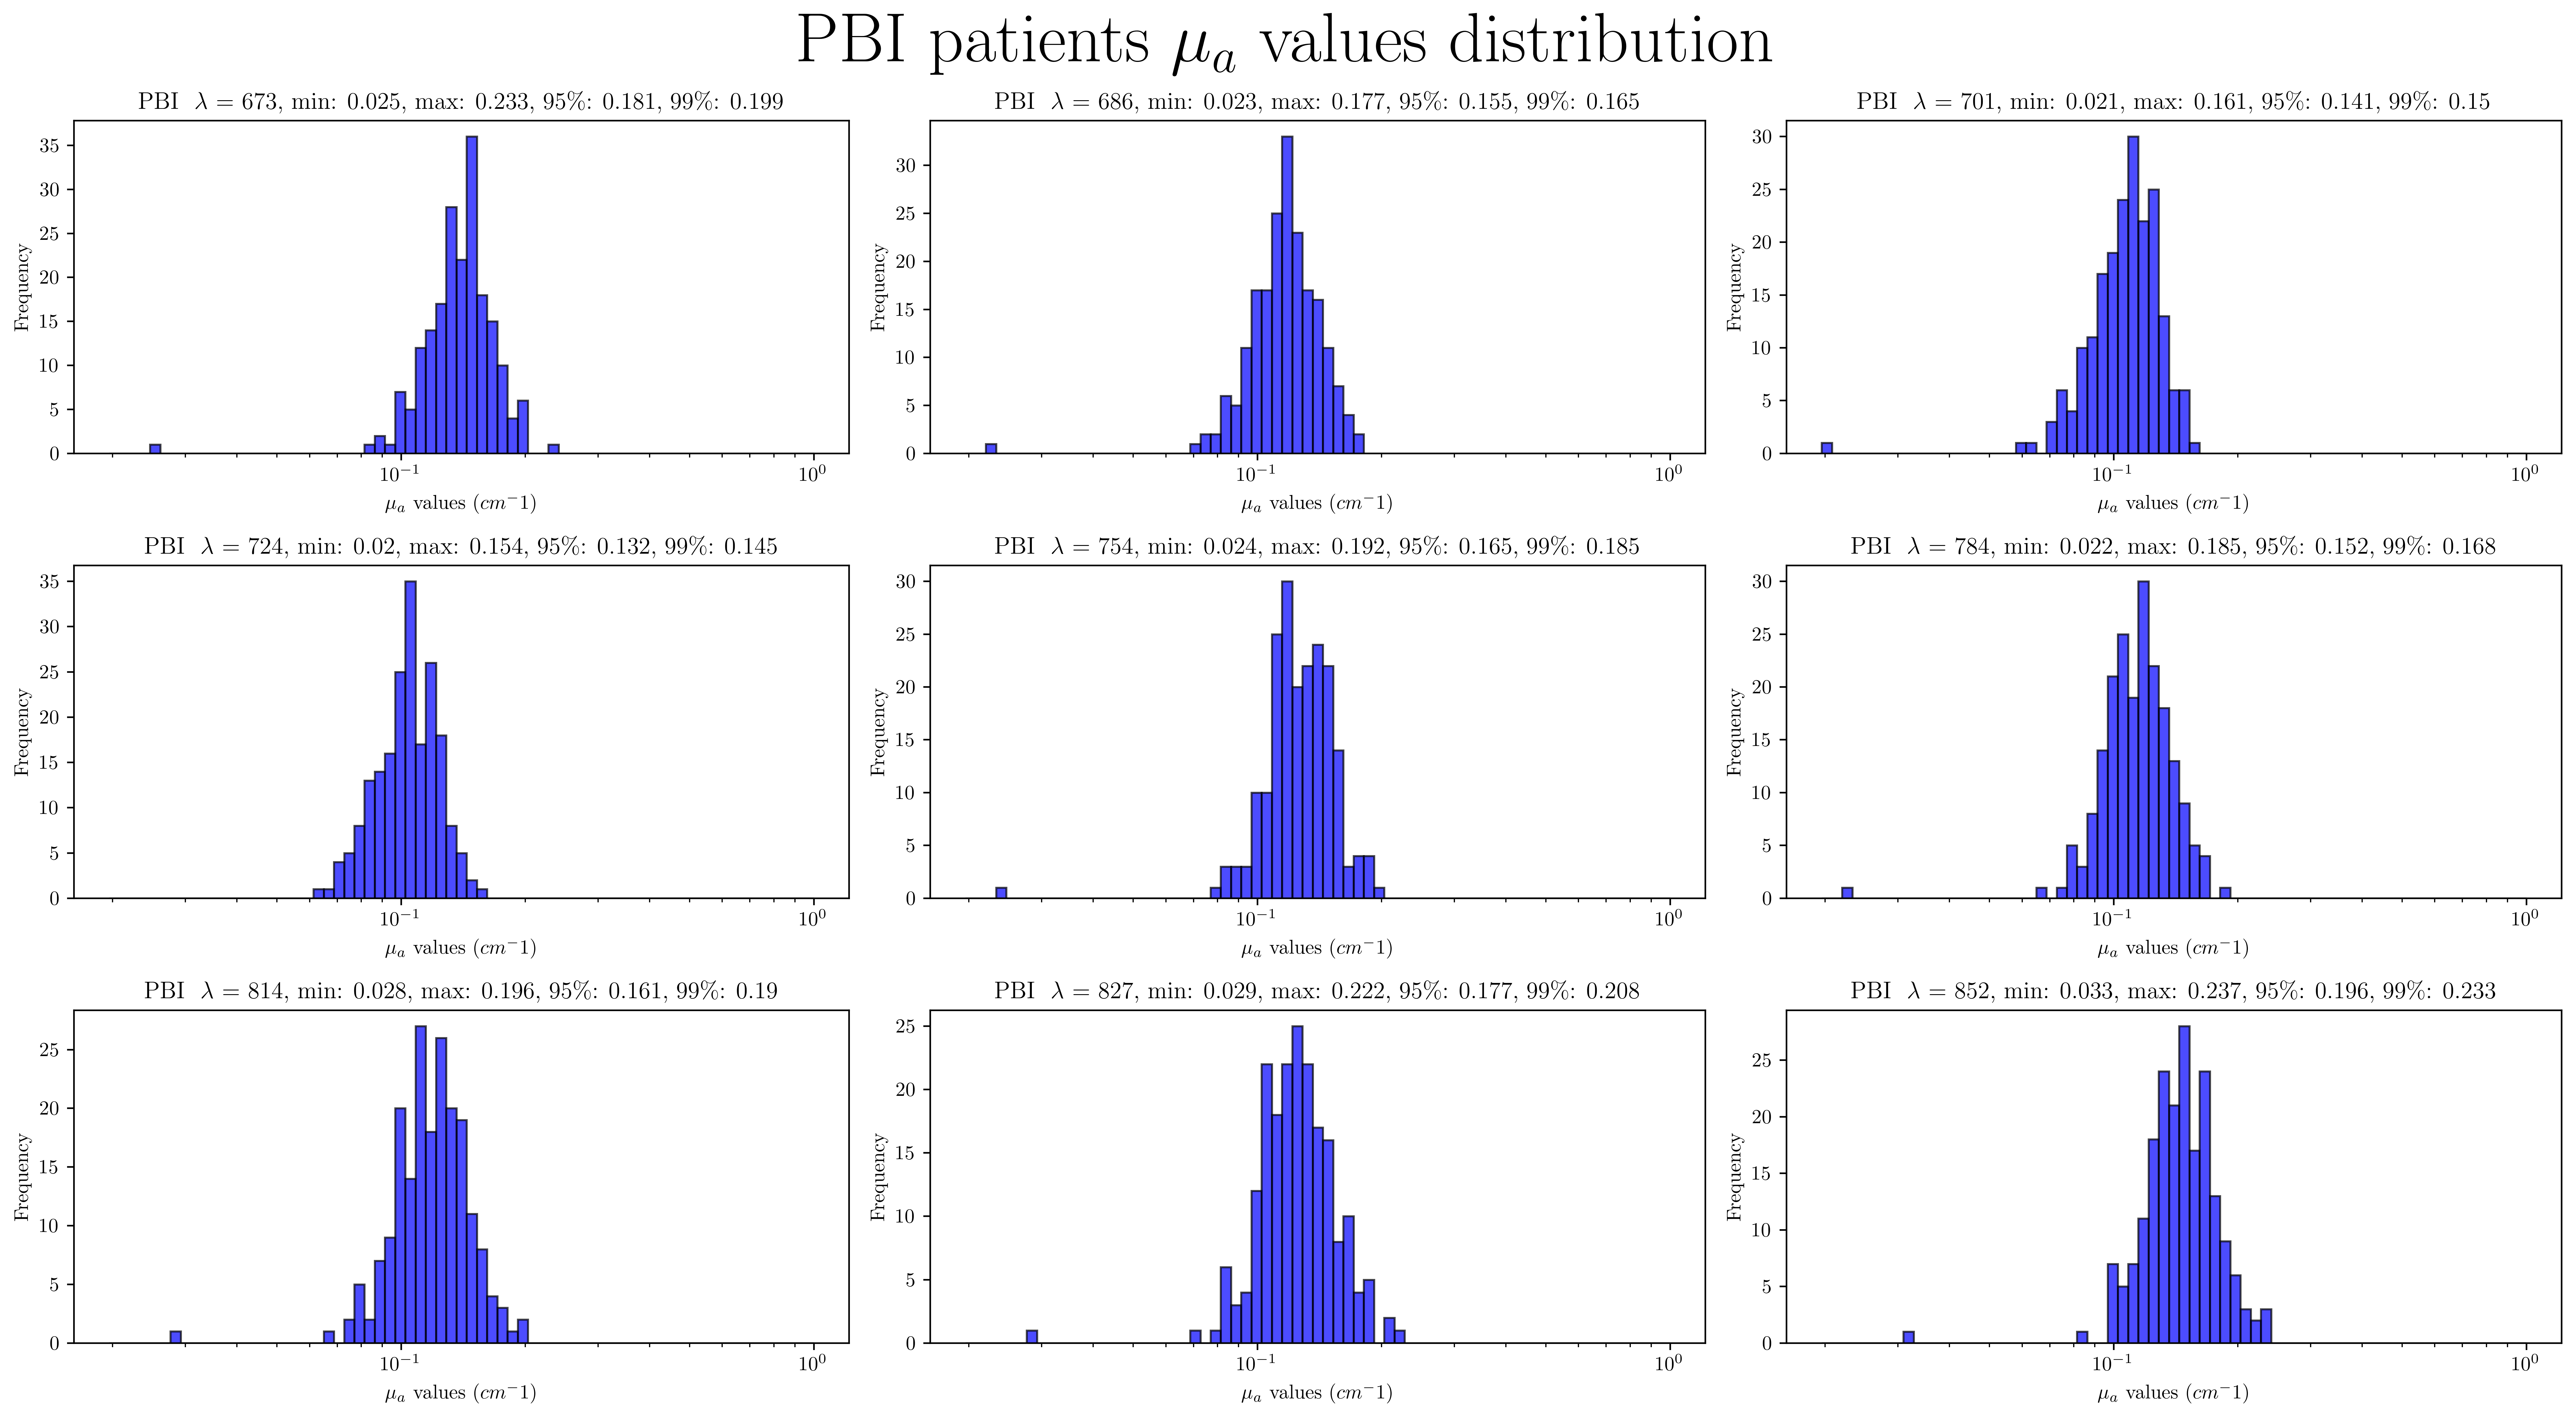

In [39]:
# Set the path to the LaTeX distribution
patients ='PBI' ; a_or_sp = 'a'; min_value_log = min_value_µa_; max_value_log = max_value_μsp_

#latex_preamble = r'\usepackage[T1]{fontenc} \usepackage{FiraMono}'
# Set the LaTeX preamble
#rc('text.latex', preamble=latex_preamble)

num_histograms = 9
log_bins = np.logspace(np.log10(min_value_log), np.log10(1), 70)


#n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

pts_dict=µs_values_dict[patients]['µ'+a_or_sp+'_dict']
stats = stat_values_dict[patients]['µ'+str(a_or_sp)+'_stats']

fig, axs = plt.subplots(3, 3, figsize=(18, 10), dpi=500)
axs = axs.flatten()

for wv in range(len(wavelengths)):
    stat_array = stats[wavelengths[wv]]
    axs[wv].hist(pts_dict[wavelengths[wv]], bins=log_bins, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xscale('log')
    axs[wv].set_xlabel(fr'$\mu_{a_or_sp}$ values ($cm^{-1}$)')
    axs[wv].set_ylabel(r"Frequency")
    axs[wv].set_title(fr"{patients} \ $\lambda$ =  {wavelengths[wv]},    min: {round(stat_array[0],3)},  max: {round(stat_array[1],3)},   95\%: {round(stat_array[2],3)},   99\%: {round(stat_array[3],3)} ")

fig.suptitle(fr"{patients} patients $\mu_{a_or_sp}$ values distribution", fontsize=35, fontweight='bold')


#plt.tight_layout()
plt.tight_layout()
plt.savefig('Histogram_'+str(patients)+'__µ_'+str(a_or_sp)+'.png', dpi=500)  
plt.show()

